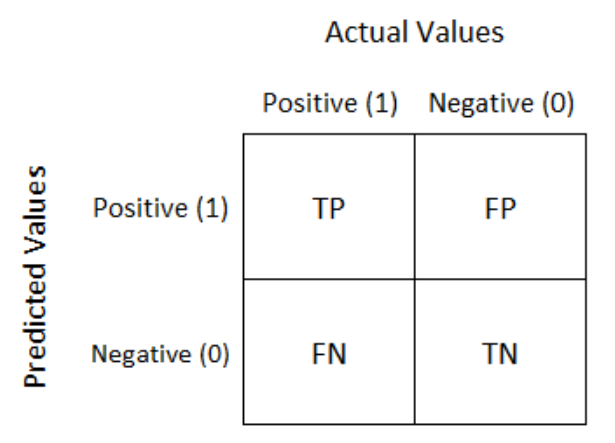
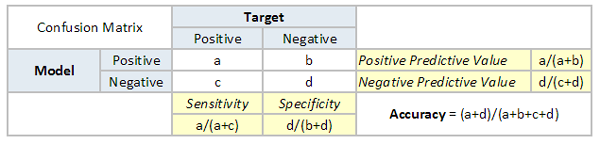
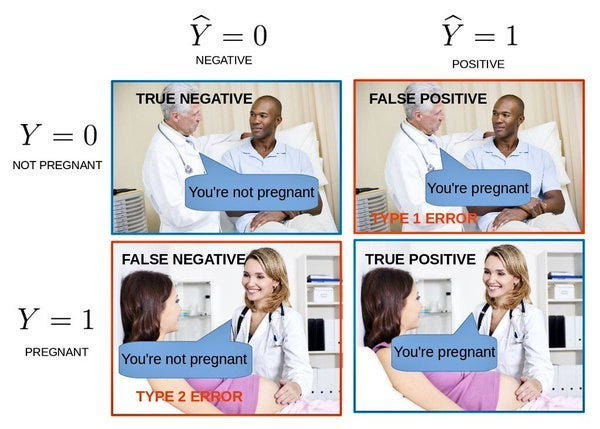

**Precision** is defined as the ratio of true positive (TP) predictions to the total number of positive predictions made by the model (i.e., the sum of true positives and false positives (FP)).

Precision= True Positives (TP)/(True Positives (TP)+False Positives (FP))

**Significance:**
Precision is particularly important when the cost of false positives is high. For example, in scenarios where the model's positive prediction needs to be highly reliable, precision becomes crucial. A high precision score indicates that the model has a low rate of false positives.

**Example:**
Consider a medical test for detecting a rare disease:

***True Positives (TP):*** The test correctly identifies 80 people who have the disease.

***False Positives (FP):*** The test incorrectly identifies 20 people as having the disease when they do not.
Let's calculate precision:

Precision= 80/80+20

= 80/100

=0.8
So, the precision is 0.8 (or 80%).

***Interpretation:***
In this example, the precision of 80% means that when the test predicts a person has the disease, it is correct 80% of the time. This is significant in medical diagnostics where a high precision is crucial to avoid unnecessary stress and treatment for people who do not have the disease.



To reduce the cost of false positives and increase the precision of a classification model

***Tune the Decision Threshold:***
By default, many classifiers use a decision threshold of 0.5. By adjusting this threshold, you can control the trade-off between precision and recall.

***Use Precision-Recall Curve:***
Analyzing the precision-recall curve can help you choose the optimal threshold.

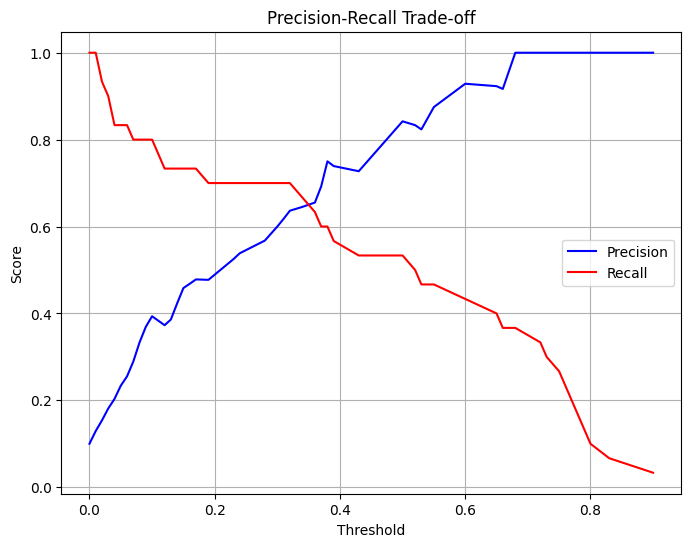

Chosen Threshold: 0.0
Precision at Chosen Threshold: 0.1
Recall at Chosen Threshold: 1.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score,classification_report,accuracy_score

# Create a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='b')
plt.plot(thresholds, recall[:-1], label='Recall', color='r')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.grid()
plt.show()

# Choose a threshold that balances precision and recall
# For example, let's choose a threshold where precision is high while keeping recall reasonable
desired_recall = 0.5
best_threshold_idx = np.argmax(recall >= desired_recall)
best_threshold = thresholds[best_threshold_idx]

# Apply the chosen threshold to get final predictions
y_pred = (y_probs >= best_threshold).astype(int)

# Evaluate precision and recall at the chosen threshold
final_precision = precision_score(y_test, y_pred)
final_recall = recall_score(y_test, y_pred)

print(f'Chosen Threshold: {best_threshold}')
print(f'Precision at Chosen Threshold: {final_precision}')
print(f'Recall at Chosen Threshold: {final_recall}')


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       270
           1       0.10      1.00      0.18        30

    accuracy                           0.10       300
   macro avg       0.05      0.50      0.09       300
weighted avg       0.01      0.10      0.02       300



c:\Users\naveen.maurya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\naveen.maurya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\naveen.maurya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [7]:
print(accuracy_score(y_test, y_pred))

0.1


**Visualizing the Trade-off**
The plot will show two curves:

***Precision Curve:*** Typically decreases as the threshold decreases because lower thresholds result in more positive predictions, including false positives.

***Recall Curve:*** Typically increases as the threshold decreases because lower thresholds result in more positive predictions, including true positives.

## **F1 Score**
The F1 score is the harmonic mean of precision and recall, calculated as follows:

F1 Score=2×Precision×Recall/(Precision+Recall)


**​Balanced Metric:**

The F1 score provides a balance between precision and recall, making it a more comprehensive metric than either precision or recall alone.
This balance is particularly useful when there is an uneven class distribution, as it ensures that neither false positives nor false negatives are disproportionately prioritized.


**Handling Imbalanced Data:**

In cases where the classes are imbalanced (e.g., rare disease detection, fraud detection), accuracy can be misleading as it might be high just by predicting the majority class.

The F1 score is more informative as it accounts for both the false positives and false negatives, offering a better reflection of a model's performance on the minority class.

**Optimization:**

When tuning model hyperparameters or thresholds, the F1 score can guide the process to find a configuration that provides a good trade-off between precision and recall.

In cases of imbalanced datasets, accuracy is generally not a reliable metric because it can be misleading. Precision, along with recall and the F1 score, provides a more meaningful evaluation of model performance.

**Why Accuracy Can Be Misleading**

***Imbalanced Data:*** In an imbalanced dataset, the majority class dominates. A model might achieve high accuracy simply by predicting the majority class for most instances, even if it fails to correctly identify the minority class.

***Example:*** Consider a dataset with 98 positive instances and 2 negative instances. If a model predicts every instance as positive, it will have 98% accuracy, but it fails completely on the negative class.

### **Precision vs. Recall vs. F1 Score**

****Precision:**** Precision is the ratio of true positive predictions to the total predicted positives. It focuses on the accuracy of the positive predictions. High precision indicates a low rate of false positives.

****Recall:**** Recall (or sensitivity) is the ratio of true positive predictions to the total actual positives. It focuses on capturing all the actual positive instances. High recall indicates a low rate of false negatives.

****F1 Score:**** The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances the trade-off between precision and recall, especially useful in imbalanced datasets.

### **When to Prefer Precision**

****False Positives are Costly:**** Prefer precision when false positives carry a higher cost. For instance, in spam detection, falsely classifying a legitimate email as spam (false positive) is problematic.

### **When to Prefer Recall**

****False Negatives are Costly:**** Prefer recall when false negatives carry a higher cost. For instance, in disease detection, failing to identify a diseased patient (false negative) is more critical.

### **When to Use the F1 Score**

****Balanced Metric:**** Use the F1 score when you need a balance between precision and recall, and both false positives and false negatives are important.

****Imbalanced Datasets:**** The F1 score is particularly valuable in imbalanced datasets because it considers both precision and recall, providing a more comprehensive measure of model performance.

### **METHOD TO MINIMIZE FALSE NEGATIVE**

**1. Adjust the Decision Threshold**

By default, many classification algorithms use a threshold of 0.5 to decide between classes. Lowering this threshold can help reduce false negatives, as it makes the model more likely to predict the positive class.

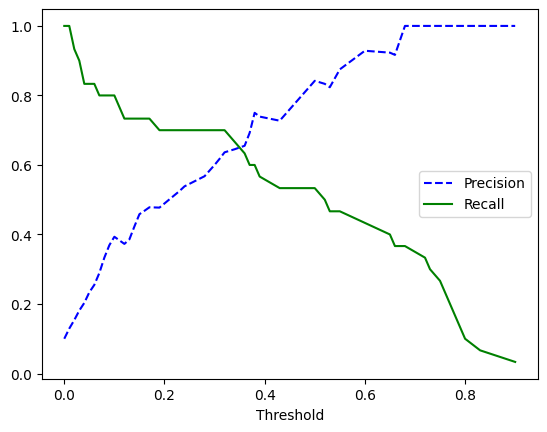

In [8]:
from sklearn.metrics import precision_recall_curve

# Assuming y_scores are the predicted probabilities and y_true are the true labels
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot precision-recall curve
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()


**2. Use a Different Loss Function**

When training your model, you can use a loss function that penalizes false negatives more heavily. For example, in a neural network, you can use a weighted loss function where the positive class (representing the disease) has a higher weight.

In [9]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier

# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Train a classifier with class weights
clf = RandomForestClassifier(class_weight=class_weights_dict)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.5582137161084529,
                                     1: 4.794520547945205})

**3. Collect More Data**

Collecting more data, especially for the minority class, can help the model learn better and reduce false negatives. This might involve gathering more samples of the positive class or using techniques like data augmentation to increase the number of positive samples.

**4. Use Ensemble Methods**

Ensemble methods, such as bagging and boosting, can improve the model’s performance by combining the predictions of multiple models. Techniques like Random Forest or Gradient Boosting are often effective.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Train an ensemble model
ensemble_model = GradientBoostingClassifier()
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test)
print("Recall:", recall_score(y_test, y_pred))


Recall: 0.6


**5. Tune Hyperparameters**

Hyperparameter tuning can help improve model performance and reduce false negatives. Use techniques like grid search or random search to find the best hyperparameters for your model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform grid search
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='recall')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best recall:", recall_score(y_test, best_model.predict(X_test)))

Best recall: 0.6


**6. Use Synthetic Data**

Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate synthetic samples for the minority class, helping to balance the dataset.

In [11]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on resampled data
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Recall:", recall_score(y_test, y_pred))


Recall: 0.7333333333333333


### **FP and FN cost optimization**

Optimal Threshold: 0.4
Minimal Total Cost: 420


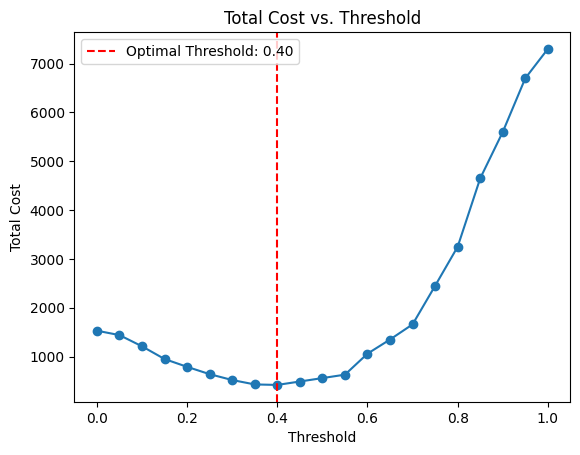

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

# Define costs
C_FP = 10
C_FN = 50

# Function to calculate total cost
def calculate_cost(y_true, y_probs, threshold, C_FP, C_FN):
    y_pred = (y_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_cost = C_FP * fp + C_FN * fn
    return total_cost

# Evaluate total cost for various thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
costs = [calculate_cost(y_test, y_probs, t, C_FP, C_FN) for t in thresholds]

# Find the threshold with the minimum cost
optimal_threshold = thresholds[np.argmin(costs)]
optimal_cost = min(costs)

print(f'Optimal Threshold: {optimal_threshold}')
print(f'Minimal Total Cost: {optimal_cost}')

# Plot the total cost vs. threshold
import matplotlib.pyplot as plt

plt.plot(thresholds, costs, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. Threshold')
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()
plt.show()

### **AUC-ROC CURVE**

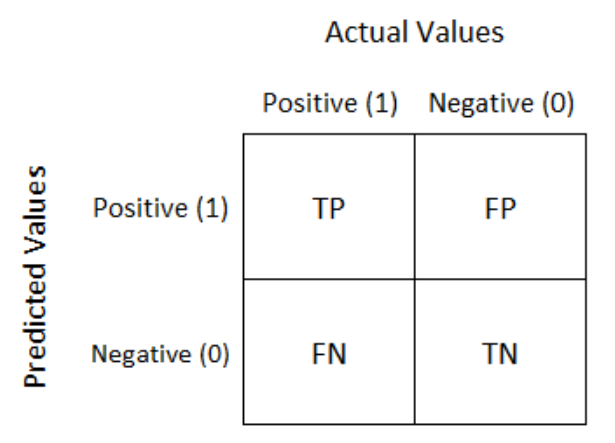
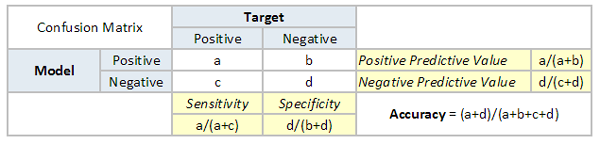

It tells how much the model is capable of distinguishing between classes. 

The ROC curve itself is a graphical representation of a model's diagnostic ability, showing the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various threshold settings.

### **Key Concepts**
**True Positive Rate (TPR):** Also known as sensitivity or recall, TPR is the ratio of correctly predicted positive observations to all actual positives.

TPR= TP/(TP+FN)

**False Positive Rate (FPR):** FPR is the ratio of incorrectly predicted positive observations to all actual negatives.

FPR= FP/(FP+TN)

**ROC Curve:** A plot of the TPR against the FPR for all possible thresholds. The area under this curve (AUC) represents the model's ability to distinguish between positive and negative classes.

***for each sensitivity, we get a different specificity. The two vary as follows:***

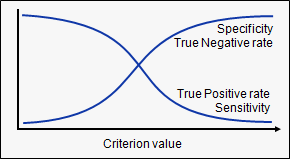

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as the false positive rate, and sensitivity is also known as the True Positive rate.

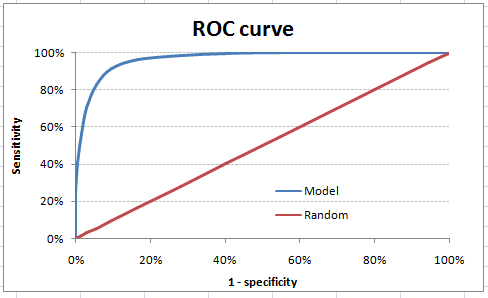

### **Significance of AUC-ROC**
**Interpretation:** The AUC value ranges from 0 to 1. A model with an AUC of 0.5 has no discrimination capability, while an AUC of 1.0 indicates perfect classification. An AUC value closer to 1 means better performance.

**Threshold Independence:** The ROC curve and the AUC are threshold-independent metrics, providing a comprehensive measure of the model's performance across all classification thresholds.

**Usefulness:** The AUC-ROC is particularly useful for comparing different models, as it provides a single metric summarizing performance across all thresholds.

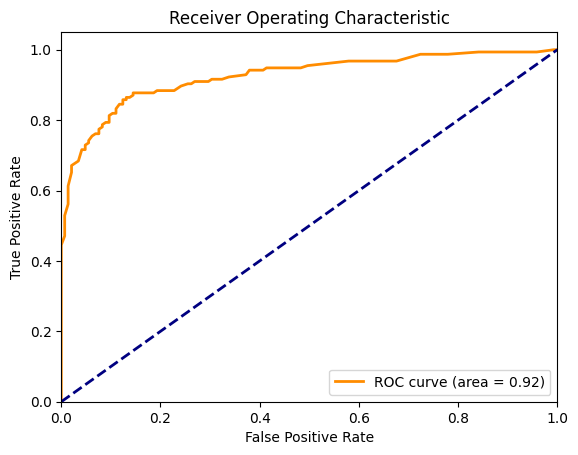

AUC: 0.92


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")


A high True Positive Rate (TPR) and a high False Positive Rate (FPR) indicate the following:

**High True Positive Rate (TPR)**

Interpretation: The model correctly identifies a large proportion of actual positive cases.

Implication: The model has high sensitivity, meaning it is good at detecting the positive class (e.g., detecting diseases in medical diagnosis).

Use Case: High TPR is desirable in situations where missing positive cases is costly, such as in disease screening, fraud detection, or any critical safety application.

**High False Positive Rate (FPR)**

Interpretation: The model incorrectly identifies a large proportion of actual negative cases as positive.

Implication: The model has low specificity, meaning it frequently misclassifies negative cases as positive.

Use Case: A high FPR can lead to many false alarms or unnecessary actions, such as unnecessary medical tests, customer inconvenience in fraud detection, or false safety warnings.

### **LOG LOSS**

Log Loss, also known as Logarithmic Loss, Logistic Loss, or Cross-Entropy Loss, is a performance metric for evaluating the accuracy of a classification model. 

It measures the uncertainty of the predictions made by a probabilistic classification model. The log loss increases as the predicted probability diverges from the actual label.

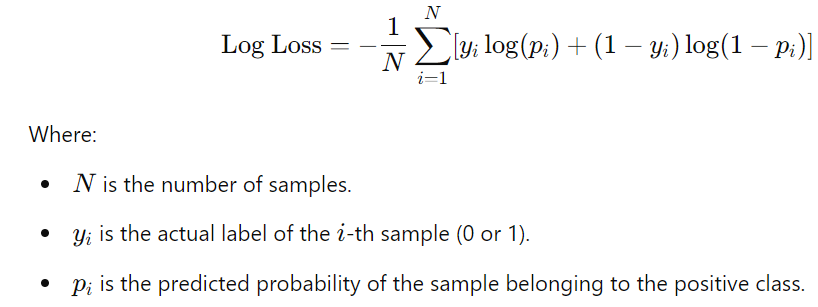

#### **Interpretation**
**Perfect Model:** A perfect model with perfect predictions (1.0 or 0.0 probability, matching actual labels) will have a log loss of 0.

**Better Predictions:** The closer the predicted probabilities are to the actual labels, the lower the log loss.

**Worse Predictions:** Log loss increases as the predicted probabilities diverge from the actual labels. For example, predicting a high probability for the incorrect class will result in a high log loss.

#### **Significance**
**Probabilistic Measure:** Unlike accuracy, which only considers the final predicted class, log loss takes into account the uncertainty of the predictions, providing a more nuanced evaluation. It penalizes confident but incorrect predictions more than less confident but correct predictions.

**Continuous Measure:** Log loss provides a continuous measure that can be used to compare models. Lower log loss indicates better model performance.

**Sensitive to Class Imbalance:** It is sensitive to class imbalance, as it considers the probabilities for all samples.

In [15]:
from sklearn.metrics import log_loss

# True labels
y_true = [1, 0, 1, 1, 0]

# Predicted probabilities for the positive class
y_pred_probs = [0.9, 0.4, 0.8, 0.3, 0.2]

# Calculate log loss
loss = log_loss(y_true, y_pred_probs)
loss


0.45328920927563454

Log Loss provides a continuous and differentiable measure of prediction accuracy. 

Models with lower log loss values are generally preferred, as they indicate better alignment between predicted probabilities and actual outcomes.

However, because log loss penalizes incorrect predictions with high confidence, models need to be well-calibrated, meaning that predicted probabilities should closely reflect true likelihoods.

##### ***Log loss penalizes incorrect predictions more heavily when the model is highly confident but wrong.***

##### ***This is due to the logarithmic component of the formula, which amplifies the penalty as the predicted probability diverges from the actual class label.***

In [17]:
from sklearn.metrics import log_loss
import numpy as np

# True label
y_true = [0]

# Scenario 1: Incorrect Prediction with High Confidence
y_pred_high_confidence = [0.99]  # High confidence for positive class

# Scenario 2: Incorrect Prediction with Low Confidence
y_pred_low_confidence = [0.1]  # Low confidence for positive class

# Calculate log loss for both scenarios
loss_high_confidence = log_loss(y_true, y_pred_high_confidence,labels=[0, 1])
loss_low_confidence = log_loss(y_true, y_pred_low_confidence,labels=[0, 1])

loss_high_confidence, loss_low_confidence


(4.605170185988091, 0.10536051565782628)

#### **Interpretation of Results**
**High Confidence, Incorrect Prediction:**
The log loss value will be high (close to infinity as the predicted probability approaches 1), indicating a severe penalty for being confidently wrong.

**Low Confidence, Incorrect Prediction:**
The log loss value will be relatively low, indicating a lesser penalty since the model was not confident in its incorrect prediction.

### **Accuracy**

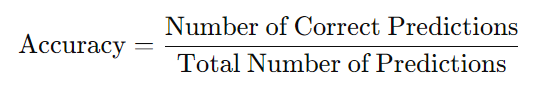

#### **Characteristics:**
**Binary Outcome:** Accuracy considers only whether a prediction is correct or incorrect. It does not consider the confidence level of the predictions.

**Threshold Dependent:** For binary classification, accuracy depends on the threshold chosen to classify the predictions (e.g., if the predicted probability is greater than 0.5, classify as positive).

### **Log Loss**

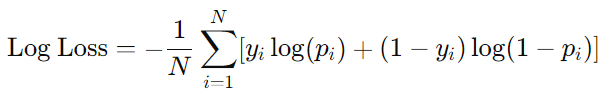

Log loss measures the performance of a classification model whose output is a probability value between 0 and 1. It penalizes incorrect predictions more when the model is confident but wrong.

#### **Characteristics:**

**Probabilistic Outcome:** Log loss considers the predicted probabilities, not just the binary outcome. It takes into account how confident the model is in its predictions.

**Penalty for Misconfidence:** The loss is higher for confident but incorrect predictions (e.g., predicting 0.99 for class 1 when the true label is 0) compared to uncertain predictions (e.g., predicting 0.5 for the same scenario).

### **How Log Loss Accounts for Uncertainty**

**Probability Estimates:** Unlike accuracy, which only considers whether the final prediction is right or wrong, log loss uses the predicted probability scores. It captures the "certainty" or "uncertainty" of predictions.

**Higher Penalty for Confident Errors:** When a model predicts a probability close to 1 for class 1 but the true class is 0, the log loss is high. This reflects a high penalty because the model was very confident in the wrong direction.

**Lower Penalty for Uncertain Predictions:** If the model predicts a probability around 0.5, indicating uncertainty, the log loss will be lower even if the prediction is wrong. This is because the model was less confident about the incorrect prediction.

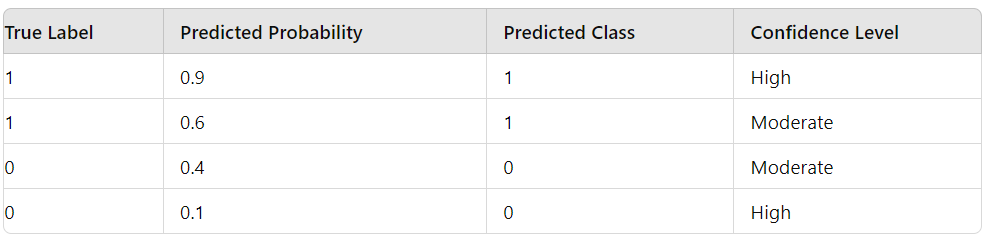